In [16]:
from sklearn.linear_model import LogisticRegression
from scipy import interp
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve,auc,classification_report,accuracy_score
from sklearn.model_selection import StratifiedKFold
import matplotlib.patches as patches
import itertools

import warnings
from sklearn.svm import SVC
from sklearn.metrics import f1_score,matthews_corrcoef,recall_score,precision_score
from feature_selector import FeatureSelector
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import KFold
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import matthews_corrcoef
from sklearn.metrics import average_precision_score
from sklearn.model_selection import LeaveOneOut
warnings.filterwarnings("ignore")
plt.rcParams['figure.constrained_layout.use'] = True

In [17]:
def perf_measure(y_actual, y_hat):
    TP = 0
    FP = 0
    TN = 0
    FN = 0

    for i in range(len(y_hat)): 
        if y_actual[i]==y_hat[i]==1:
           TP += 1
        if y_hat[i]==1 and y_actual[i]!=y_hat[i]:
           FP += 1
        if y_actual[i]==y_hat[i]==0:
           TN += 1
        if y_hat[i]==0 and y_actual[i]!=y_hat[i]:
           FN += 1

    return(TP, FP, TN, FN)

In [18]:

def printPerformance(actual,predicted):
    
    print("Mean Accuracy: {0}".format(accuracy_score(actual,predicted)))
    print("Mean Precision: {0}".format(precision_score(actual,predicted)))
    print("Mean Recall: {0}".format(recall_score(actual,predicted)))
    print("Mean MCC Score: {0}".format(matthews_corrcoef(actual,predicted)))
    print("Mean F1-Score: {0}".format(f1_score(actual,predicted)))
    tn, fp, fn, tp = confusion_matrix(actual, predicted).ravel()
    specificity = tn / (tn+fp)
    print("specificity: {0}".format(specificity))

In [7]:
class_names=['Rural','Urban']

In [19]:
df=pd.read_csv('CleanedData.csv')

In [20]:
df.head()

,Unnamed: 0,UID,Current Stream,HigherStudyMarks,SecClassMarks,B.Tech CGPA,EnglishScore,QuntAbility,LogicalAbility,ProgrammingScore,DomaninKnowledge,AutomataScore,AutomataFixScore,EssayWritingScore,Backlog,Gender,PlacementStatus,OfferedSalary
0,0,17BCS3755,0,79.8,64.4,48.7,615.0,380.0,250.0,370.0,340.0,9.0,0.0,306.0,4.0,1,0,0.0
1,1,17BCS3756,0,93.1,88.6,78.0,615.0,640.0,660.0,625.0,580.0,52.0,0.0,648.0,0.0,1,1,4.5
2,2,17BCS3757,0,74.0,70.6,63.1,645.0,410.0,610.0,240.0,380.0,7.0,0.0,612.0,0.0,0,0,0.0
3,3,17BCS3758,0,95.0,80.4,81.3,805.0,710.0,680.0,670.0,700.0,79.0,0.0,495.0,0.0,1,1,6.5
4,4,17BCS3759,0,87.4,70.8,76.8,735.0,505.0,585.0,375.0,420.0,4.0,0.0,567.0,0.0,0,0,0.0


In [21]:
df.isnull().sum()

Unnamed: 0           0
UID                  0
Current Stream       0
HigherStudyMarks     0
SecClassMarks        0
B.Tech CGPA          0
EnglishScore         0
QuntAbility          0
LogicalAbility       0
ProgrammingScore     0
DomaninKnowledge     0
AutomataScore        0
AutomataFixScore     0
EssayWritingScore    0
Backlog              0
Gender               0
PlacementStatus      0
OfferedSalary        0
dtype: int64

In [22]:
df.dropna(inplace=True)

In [23]:
df.shape

(515, 18)

In [25]:
y=df['PlacementStatus']
final_df=df.drop(['PlacementStatus'],axis=1)

In [100]:
X=final_df.drop(['Unnamed: 0','UID'],axis=1,inplace=True)
y.value_counts()


1    336
0    179
Name: PlacementStatus, dtype: int64

In [32]:
scaler=StandardScaler()
Scaled_X=scaler.fit_transform(X)
#xtest_scaled=scaler.transform(xtest)

In [34]:
def run_kfold(clf,X):
    #kf=LeaveOneOut()
    kf = StratifiedKFold(n_splits=10,shuffle=True,random_state=42)
    #####,
    AccList=np.array([])
    F1List=np.array([])
    mccList=np.array([])
    recallList=np.array([])
    precisionList=np.array([])
    specificityList=np.array([])
    predicted_targets = np.array([])
    actual_targets = np.array([])
    #######
   
    fold = 0
    for train_index, test_index in kf.split(X,y):
        fold += 1
        Xtrain, Xtest = X[train_index], X[test_index]
        ytrain, ytest = y[train_index], y[test_index]
        clf.fit(Xtrain, ytrain)
        predictions = clf.predict(Xtest)
        #####
        predicted_targets = np.append(predicted_targets, predictions)
        actual_targets = np.append(actual_targets, ytest)
        AccList=np.append(AccList,accuracy_score(ytest,predictions))
        F1List=np.append(F1List,f1_score(ytest,predictions))
        mccList=np.append(mccList,matthews_corrcoef(ytest,predictions))
        recallList=np.append(recallList,recall_score(ytest,predictions))
        precisionList=np.append(precisionList,precision_score(ytest,predictions))
        tn, fp, fn, tp = confusion_matrix(ytest,predictions).ravel()
        specificity = tn / (tn+fp)
        specificityList=np.append(specificityList,specificity)
        #####
      
    return predicted_targets, actual_targets,AccList,F1List,mccList,recallList,precisionList,specificityList

In [35]:
logreg = LogisticRegression(C= 0.01, penalty= 'l2', solver= 'newton-cg',random_state=0)
lrpredicted_target, lractual_target,AccList,F1List,mccList,recallList,precisionList,specificityList=run_kfold(logreg,Scaled_X)
printPerformance(lractual_target,lrpredicted_target)
print("std dev Accuracy: {0}".format(np.std(AccList)))
print("std dev F1-Score: {0}".format(np.std(F1List)))
print("std dev mcc: {0}".format(np.std(mccList)))
print("std dev recall score: {0}".format(np.std(recallList)))
print("std dev precision score: {0}".format(precisionList.std()))
print("std dev specificity score: {0}".format(specificityList.std()))

Mean Accuracy: 0.8621359223300971
Mean Precision: 0.8441558441558441
Mean Recall: 0.9672619047619048
Mean MCC Score: 0.6928780442437962
Mean F1-Score: 0.9015256588072121
specificity: 0.664804469273743
std dev Accuracy: 0.04491121188489398
std dev F1-Score: 0.029874498198883624
std dev mcc: 0.10289891463743062
std dev recall score: 0.025229114309820794
std dev precision score: 0.04511419593097736
std dev specificity score: 0.1158564716793519


In [116]:


randomforest = RandomForestClassifier(random_state=0, criterion= 'gini',
                            max_features= 5,
                            min_samples_leaf=2,
                            min_samples_split= 2,
                            n_estimators=50,
                            n_jobs=-1,
                            oob_score= True,
                            warm_start= True)
rfpredicted_target, rfactual_target,AccList,F1List,mccList,recallList,precisionList,specificityList=run_kfold(randomforest,Scaled_X)
printPerformance(rfactual_target,rfpredicted_target)
print("std dev Accuracy: {0}".format(np.std(AccList)))
print("std dev F1-Score: {0}".format(np.std(F1List)))
print("std dev mcc: {0}".format(np.std(mccList)))
print("std dev recall score: {0}".format(np.std(recallList)))
print("std dev precision score: {0}".format(precisionList.std()))
print("std dev specificity score: {0}".format(specificityList.std()))

Mean Accuracy: 1.0
Mean Precision: 1.0
Mean Recall: 1.0
Mean MCC Score: 1.0
Mean F1-Score: 1.0
specificity: 1.0
std dev Accuracy: 0.0
std dev F1-Score: 0.0
std dev mcc: 0.0
std dev recall score: 0.0
std dev precision score: 0.0
std dev specificity score: 0.0


In [37]:


sc = StandardScaler()
svc = SVC(C= 100, gamma= 0.0001, kernel= 'rbf',random_state=0)
#X_train = sc.fit_transform(X)
kf = StratifiedKFold(n_splits=10,shuffle=True,random_state=42)
    #####,
svcAccList=np.array([])
svcF1List=np.array([])
svcmccList=np.array([])
svcrecallList=np.array([])
svcprecisionList=np.array([])
svcspecificityList=np.array([])
svcpredicted_targets = np.array([])
svcactual_targets = np.array([])
    #######
   
fold = 0
for train_index, test_index in kf.split(X,y):
    fold += 1
    Xtrain, Xtest = X.iloc[train_index], X.iloc[test_index]
    ytrain, ytest = y[train_index], y[test_index]
    Xtrain=sc.fit_transform(Xtrain)
    Xtest=sc.transform(Xtest)
    svc.fit(Xtrain, ytrain)
    svcpredictions = svc.predict(Xtest)
    svcpredicted_targets = np.append(svcpredicted_targets, svcpredictions)
    svcactual_targets = np.append(svcactual_targets, ytest)
    svcAccList=np.append(svcAccList,accuracy_score(ytest,svcpredictions))
    svcF1List=np.append(svcF1List,f1_score(ytest,svcpredictions))
    svcmccList=np.append(svcmccList,matthews_corrcoef(ytest,svcpredictions))
    svcrecallList=np.append(svcrecallList,recall_score(ytest,svcpredictions))
    svcprecisionList=np.append(svcprecisionList,precision_score(ytest,svcpredictions))
    tn, fp, fn, tp = confusion_matrix(ytest,svcpredictions).ravel()
    svcspecificity = tn / (tn+fp)
    svcspecificityList=np.append(svcspecificityList,svcspecificity)

printPerformance(svcactual_targets,svcpredicted_targets)
print("std dev Accuracy: {0}".format(np.std(svcAccList)))
print("std dev F1-Score: {0}".format(np.std(svcF1List)))
print("std dev mcc: {0}".format(np.std(svcmccList)))
print("std dev recall score: {0}".format(np.std(svcrecallList)))
print("std dev precision score: {0}".format(svcprecisionList.std()))
print("std dev specificity score: {0}".format(svcspecificityList.std()))


Mean Accuracy: 0.9902912621359223
Mean Precision: 1.0
Mean Recall: 0.9851190476190477
Mean MCC Score: 0.9789532717558962
Mean F1-Score: 0.9925037481259371
specificity: 1.0
std dev Accuracy: 0.013069895088082404
std dev F1-Score: 0.010328919142142123
std dev mcc: 0.027193963577189003
std dev recall score: 0.020131754528428934
std dev precision score: 0.0
std dev specificity score: 0.0


In [90]:
pca=PCA(n_components=9)
x_pca=pca.fit_transform(scaler.fit_transform(X))


In [91]:
x_pca.shape

(515, 9)

In [92]:
expl_var_pca = np.var(x_pca, axis=0)


In [93]:
expl_var_pca

array([5.29254011, 1.50836669, 1.33063941, 1.03507682, 0.96572683,
       0.82900994, 0.62402493, 0.57458131, 0.55293244])

In [94]:
eigenvalues=pca.components_

In [95]:
N_elements=10
PC1=abs(eigenvalues[1,:])
PC1.sort(axis=0)
PC1=PC1[::-1]
PC1=PC1[0:N_elements]
PC1

array([0.40757475, 0.37778508, 0.34788517, 0.34081562, 0.32221122,
       0.31456903, 0.30600138, 0.29419586, 0.21380332, 0.09215609])

In [96]:
logreg = LogisticRegression(C= 0.01, penalty= 'l2', solver= 'newton-cg',random_state=0)
lrpredicted_target, lractual_target,AccList,F1List,mccList,recallList,precisionList,specificityList=run_kfold(logreg,x_pca)
printPerformance(lractual_target,lrpredicted_target)
print("std dev Accuracy: {0}".format(np.std(AccList)))
print("std dev F1-Score: {0}".format(np.std(F1List)))
print("std dev mcc: {0}".format(np.std(mccList)))
print("std dev recall score: {0}".format(np.std(recallList)))
print("std dev precision score: {0}".format(precisionList.std()))
print("std dev specificity score: {0}".format(specificityList.std()))

Mean Accuracy: 0.8621359223300971
Mean Precision: 0.8459530026109661
Mean Recall: 0.9642857142857143
Mean MCC Score: 0.6922491137009318
Mean F1-Score: 0.9012517385257302
specificity: 0.6703910614525139
std dev Accuracy: 0.04219571583179374
std dev F1-Score: 0.028716994469527888
std dev mcc: 0.09723170784348953
std dev recall score: 0.02946155241530528
std dev precision score: 0.04046369648304076
std dev specificity score: 0.10311273182780145


In [97]:

randomforest = RandomForestClassifier(random_state=0, criterion= 'gini',
                            max_features= 5,
                            min_samples_leaf=2,
                            min_samples_split= 2,
                            n_estimators=50,
                            n_jobs=-1,
                            oob_score= True,
                            warm_start= True)
rfpredicted_target, rfactual_target,AccList,F1List,mccList,recallList,precisionList,specificityList=run_kfold(randomforest,x_pca)
printPerformance(rfactual_target,rfpredicted_target)
print("std dev Accuracy: {0}".format(np.std(AccList)))
print("std dev F1-Score: {0}".format(np.std(F1List)))
print("std dev mcc: {0}".format(np.std(mccList)))
print("std dev recall score: {0}".format(np.std(recallList)))
print("std dev precision score: {0}".format(precisionList.std()))
print("std dev specificity score: {0}".format(specificityList.std()))

Mean Accuracy: 0.9902912621359223
Mean Precision: 0.9910979228486647
Mean Recall: 0.9940476190476191
Mean MCC Score: 0.9785740587522237
Mean F1-Score: 0.9925705794947994
specificity: 0.9832402234636871
std dev Accuracy: 0.023172840617928958
std dev F1-Score: 0.017250997321486074
std dev mcc: 0.051526547401248075
std dev recall score: 0.011944621694992741
std dev precision score: 0.025000000000000012
std dev specificity score: 0.04999999999999999


In [98]:


sc = StandardScaler()
svc = SVC(C= 100, gamma= 0.0001, kernel= 'rbf',random_state=0)
#X_train = sc.fit_transform(X)
kf = StratifiedKFold(n_splits=10,shuffle=True,random_state=42)
    #####,
svcAccList=np.array([])
svcF1List=np.array([])
svcmccList=np.array([])
svcrecallList=np.array([])
svcprecisionList=np.array([])
svcspecificityList=np.array([])
svcpredicted_targets = np.array([])
svcactual_targets = np.array([])
    #######
   
fold = 0
for train_index, test_index in kf.split(x_pca,y):
    fold += 1
    Xtrain, Xtest = x_pca[train_index], x_pca[test_index]
    ytrain, ytest = y[train_index], y[test_index]
    Xtrain=sc.fit_transform(Xtrain)
    Xtest=sc.transform(Xtest)
    svc.fit(Xtrain, ytrain)
    svcpredictions = svc.predict(Xtest)
    svcpredicted_targets = np.append(svcpredicted_targets, svcpredictions)
    svcactual_targets = np.append(svcactual_targets, ytest)
    svcAccList=np.append(svcAccList,accuracy_score(ytest,svcpredictions))
    svcF1List=np.append(svcF1List,f1_score(ytest,svcpredictions))
    svcmccList=np.append(svcmccList,matthews_corrcoef(ytest,svcpredictions))
    svcrecallList=np.append(svcrecallList,recall_score(ytest,svcpredictions))
    svcprecisionList=np.append(svcprecisionList,precision_score(ytest,svcpredictions))
    tn, fp, fn, tp = confusion_matrix(ytest,svcpredictions).ravel()
    svcspecificity = tn / (tn+fp)
    svcspecificityList=np.append(svcspecificityList,svcspecificity)

printPerformance(svcactual_targets,svcpredicted_targets)
print("std dev Accuracy: {0}".format(np.std(svcAccList)))
print("std dev F1-Score: {0}".format(np.std(svcF1List)))
print("std dev mcc: {0}".format(np.std(svcmccList)))
print("std dev recall score: {0}".format(np.std(svcrecallList)))
print("std dev precision score: {0}".format(svcprecisionList.std()))
print("std dev specificity score: {0}".format(svcspecificityList.std()))


Mean Accuracy: 0.9805825242718447
Mean Precision: 0.9909638554216867
Mean Recall: 0.9791666666666666
Mean MCC Score: 0.9575474212888748
Mean F1-Score: 0.9850299401197604
specificity: 0.9832402234636871
std dev Accuracy: 0.015092427267772322
std dev F1-Score: 0.01175151970241389
std dev mcc: 0.03214059149668204
std dev recall score: 0.02330689358813711
std dev precision score: 0.013478163808693652
std dev specificity score: 0.025971655537654292


In [101]:
map= pd.DataFrame(pca.components_.T,index=final_df.columns.values)
map.head()

,0,1,2,3,4,5,6,7,8
Current Stream,0.089823,-0.072922,0.286858,-0.039826,0.878320,-0.293789,0.111886,0.026669,0.101772
HigherStudyMarks,-0.220860,0.294196,-0.361593,0.305016,0.118745,-0.343989,-0.101970,0.024907,-0.213603
SecClassMarks,-0.240198,0.314569,-0.208260,0.399241,-0.042348,-0.356157,0.040690,-0.059780,0.132392
B.Tech CGPA,-0.332776,0.347885,-0.057924,-0.283903,0.108940,-0.042685,-0.014933,0.012531,0.047927
EnglishScore,-0.273719,-0.407575,-0.145187,0.106220,-0.070953,-0.008025,0.065759,-0.155400,0.262230


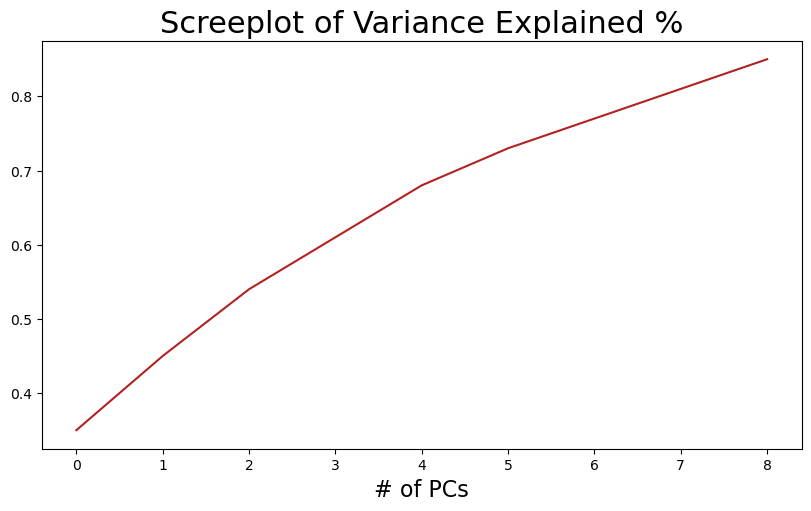

In [102]:
variance_exp_cumsum = pca.explained_variance_ratio_.cumsum().round(2)
fig, axes = plt.subplots(1,1,figsize=(8,5), dpi=100)
plt.plot(variance_exp_cumsum, color='firebrick')
plt.title('Screeplot of Variance Explained %', fontsize=22)
plt.xlabel('# of PCs', fontsize=16)
plt.show()

In [103]:
# original_num_df the original numeric dataframe
# pca is the model
def create_importance_dataframe(pca, original_num_df):

    # Change pcs components ndarray to a dataframe
    importance_df  = pd.DataFrame(pca.components_)

    # Assign columns
    importance_df.columns  = original_num_df.columns

    # Change to absolute values
    importance_df =importance_df.apply(np.abs)

    # Transpose
    importance_df=importance_df.transpose()

    # Change column names again

    ## First get number of pcs
    num_pcs = importance_df.shape[1]

    ## Generate the new column names
    new_columns = [f'PC{i}' for i in range(1, num_pcs + 1)]

    ## Now rename
    importance_df.columns  =new_columns

    # Return importance df
    return importance_df



In [104]:
# Call function to create importance df
importance_df  =create_importance_dataframe(pca, final_df)

# Show first few rows
display(importance_df.head(10))

# Sort depending on PC of interest

## PC1 top 10 important features
pc1_top_10_features = importance_df['PC1'].sort_values(ascending = False)[:10]
print(), print(f'PC1 top 10 feautres are \n')
display(pc1_top_10_features )

## PC2 top 10 important features
pc2_top_10_features = importance_df['PC2'].sort_values(ascending = False)[:10]
print(), print(f'PC2 top 10 feautres are \n')

display(pc2_top_10_features )

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9
Current Stream,0.089823,0.072922,0.286858,0.039826,0.878320,0.293789,0.111886,0.026669,0.101772
HigherStudyMarks,0.220860,0.294196,0.361593,0.305016,0.118745,0.343989,0.101970,0.024907,0.213603
SecClassMarks,0.240198,0.314569,0.208260,0.399241,0.042348,0.356157,0.040690,0.059780,0.132392
B.Tech CGPA,0.332776,0.347885,0.057924,0.283903,0.108940,0.042685,0.014933,0.012531,0.047927
EnglishScore,0.273719,0.407575,0.145187,0.106220,0.070953,0.008025,0.065759,0.155400,0.262230
QuntAbility,0.276660,0.322211,0.027096,0.161517,0.042210,0.180558,0.029345,0.436991,0.492976
LogicalAbility,0.321493,0.377785,0.061896,0.058233,0.003709,0.126164,0.053354,0.198665,0.020645
ProgrammingScore,0.301436,0.026243,0.221050,0.020359,0.051343,0.150779,0.265004,0.543899,0.375494
DomaninKnowledge,0.311428,0.074056,0.094472,0.032170,0.006357,0.015209,0.114289,0.126796,0.670407
AutomataScore,0.290723,0.071681,0.321579,0.213057,0.019490,0.164232,0.217876,0.020962,0.047181



PC1 top 10 feautres are 



B.Tech CGPA          0.332776
LogicalAbility       0.321493
DomaninKnowledge     0.311428
ProgrammingScore     0.301436
AutomataScore        0.290723
AutomataFixScore     0.281176
QuntAbility          0.276660
EnglishScore         0.273719
OfferedSalary        0.253447
EssayWritingScore    0.252512
Name: PC1, dtype: float64


PC2 top 10 feautres are 



EnglishScore         0.407575
LogicalAbility       0.377785
B.Tech CGPA          0.347885
EssayWritingScore    0.340816
QuntAbility          0.322211
SecClassMarks        0.314569
Backlog              0.306001
HigherStudyMarks     0.294196
OfferedSalary        0.213803
AutomataFixScore     0.092156
Name: PC2, dtype: float64

In [105]:
pca.explained_variance_ratio_

array([0.35283601, 0.10055778, 0.08870929, 0.06900512, 0.06438179,
       0.05526733, 0.04160166, 0.03830542, 0.03686216])

Text(0.5, 1.0, 'Contributions of variables to PC1')

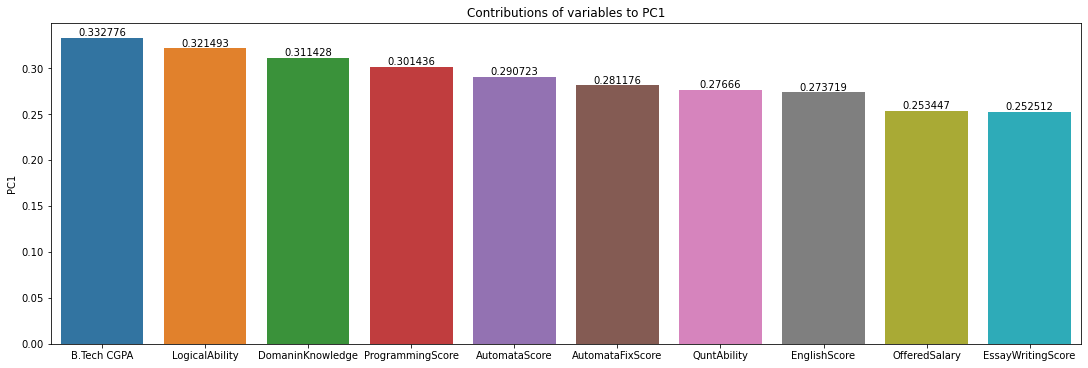

In [108]:

plt.figure(figsize=(15,5))

ax=sns.barplot(x=pc1_top_10_features.index,y=pc1_top_10_features,ci='none')
for container in ax.containers:
    ax.bar_label(container)
plt.title('Contributions of variables to PC1')

Text(0.5, 1.0, 'Contributions of variables to PC2')

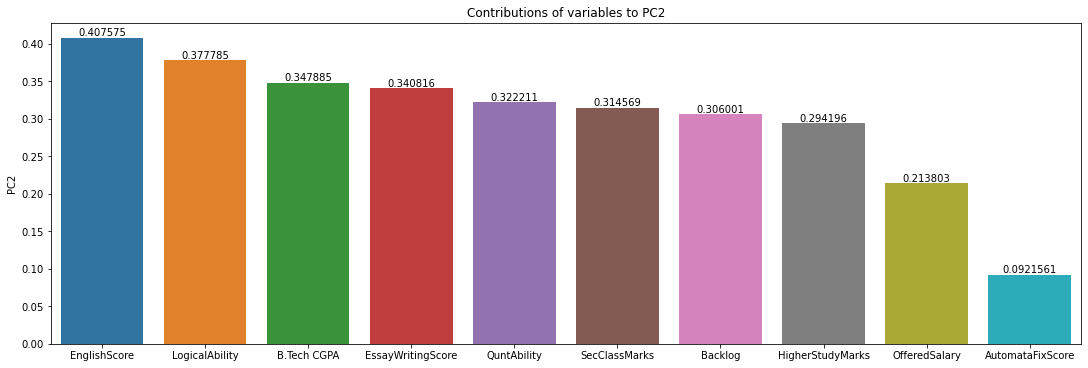

In [110]:
plt.figure(figsize=(15,5))
ax=sns.barplot(x=pc2_top_10_features.index,y=pc2_top_10_features,ci='none')
for container in ax.containers:
    ax.bar_label(container)
plt.title('Contributions of variables to PC2')

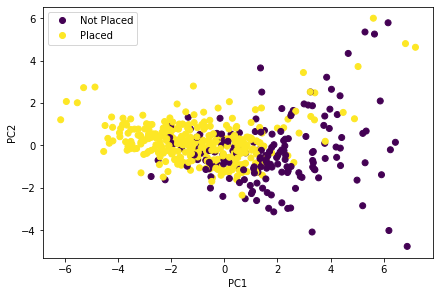

In [112]:
classes = ['Not Placed','Placed']
ax=plt.scatter(x_pca[:,0], x_pca[:,1], c = y)
plt.xlabel('PC1')
plt.ylabel('PC2')

plt.legend(handles=ax.legend_elements()[0],labels=classes)
plt.show()